# Exploratory Data Analysis | Health and Sleep relation 👽

The sleep disorders has been linked to a wide range of health issues like stress, body mass index (bmi) or cardiovascular problems. 

The knowledge about the factors that infuence  sleep quality can provide insights for promoting healthier lifestyles.

The project explore the relationship between sleep patterns and overall health. It includes details like lifestyle factors or health metrics, allowing conclude how sleep interacts with physical and mental conditions.

**Guiding question:**

*Which factors are associated with sleep quality and the presence of sleep disorders in this dataset?*

# 📚 Imports and Reading data

In [2]:
import pandas as pd
import kagglehub as kh
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'\Data analyst\projects\health_and_sleep_relation\Sleep_health_and_lifestyle_dataset.csv')

# 🎨 customize

In [4]:
color = ["#38b5af","#71878F","#10B4FB","#1BD59D","#913EA0","#BE206A"]

# 🧠 Data understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# 🛠 Data preparation

### Columns renaming 

In [8]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [9]:
new_names = []
for old_names in df.columns:
    new_col_names = old_names.lower().replace(' ', '_')
    new_names.append(new_col_names)
df.columns = new_names

In [10]:
df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')

### Nulls fixing

In [11]:
df.isna().sum()

person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64

In [12]:
df['sleep_disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

**Note**

In this case, the last column is the only one whose has NaN values. I concluded NaN means the person hasn't sleep disorder. i will fill NaN values with "healthy_sleep".

In [13]:
df['sleep_disorder'] = df['sleep_disorder'].fillna("healthy_sleep")

### Duplicated processing

In [14]:
df.duplicated().sum()

np.int64(0)

### Data inconsistencies

In [15]:
for cols in df.columns:
    print(df[cols].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [16]:
df['bmi_category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

**Note**

BMI column has 2 values that are the same. I will merge them with "Normal".

In [17]:
bmi = {'Normal Weight':'Normal'}
df['bmi_category'] = df['bmi_category'].replace(bmi)
df['bmi_category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

# Sample Profile

## Participant Profile

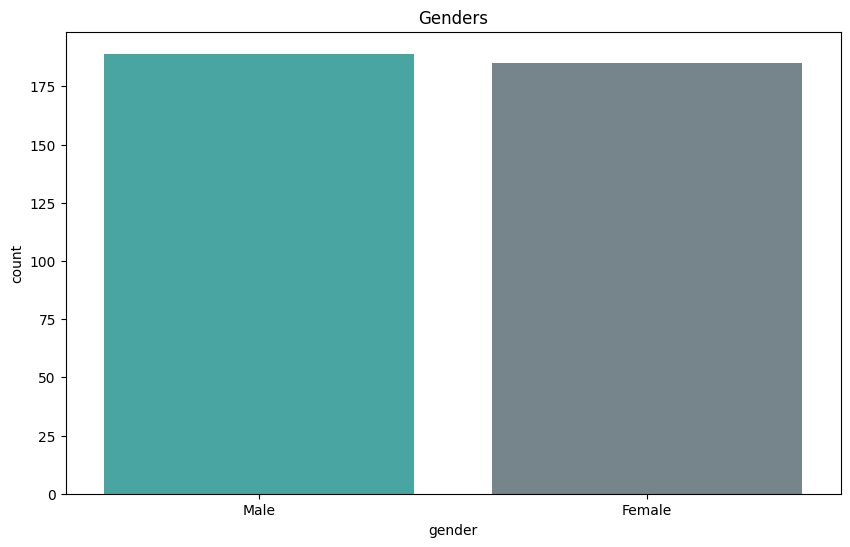

In [18]:
gender_palette = sns.color_palette(color,n_colors=2)
plt.figure(figsize=(10,6))
plt.title("Genders")
sns.countplot(data=df, x='gender',palette=gender_palette, hue='gender', legend=False )
plt.show()

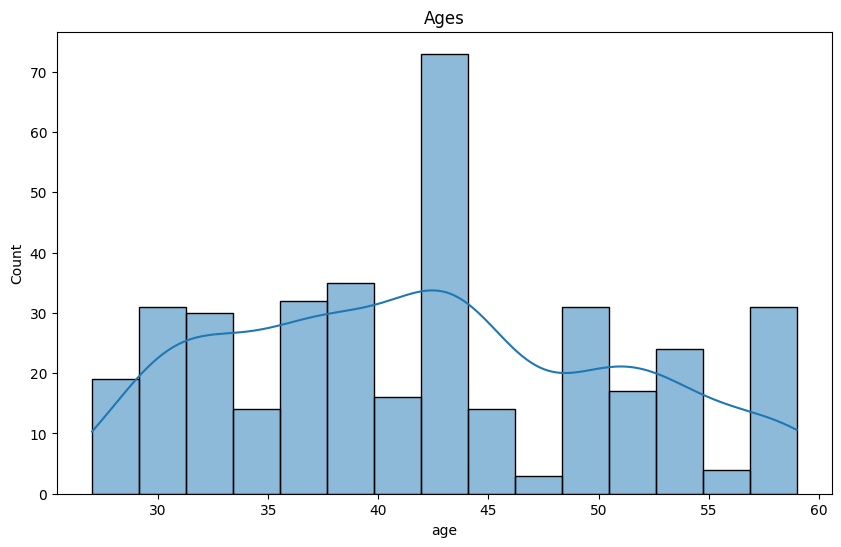

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df,x='age',bins=15, kde=True)
plt.title('Ages')
plt.show()

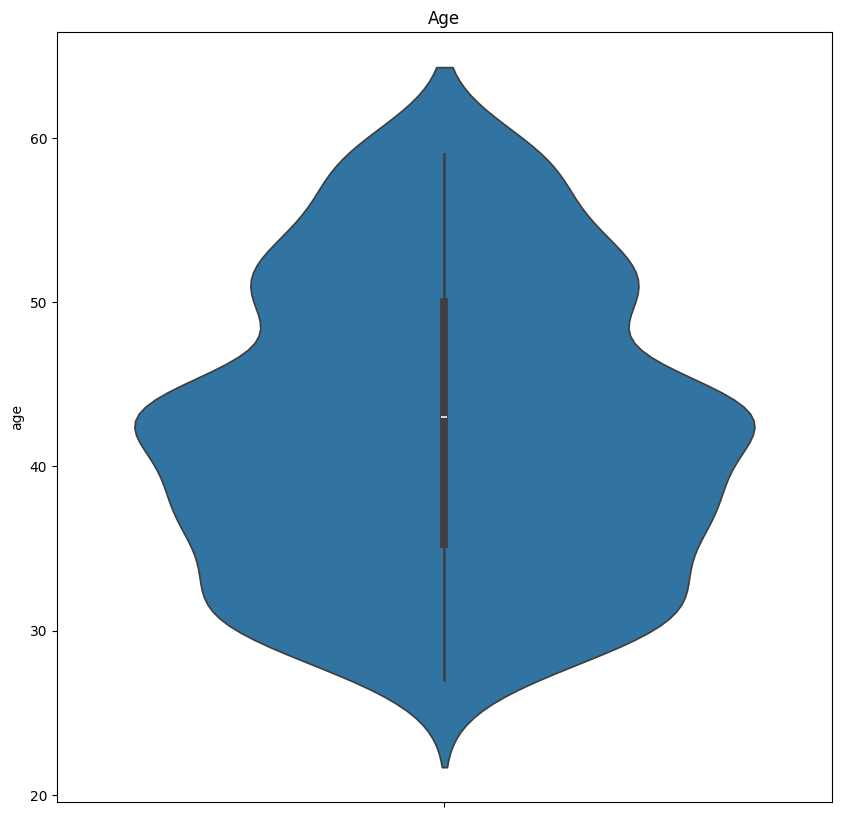

In [20]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df['age'])
plt.title('Age')
plt.show()

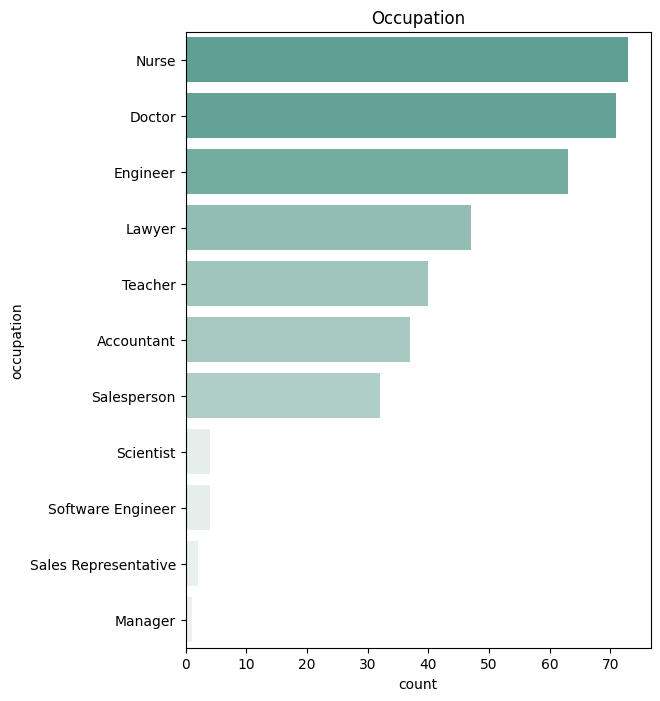

In [21]:
occupation = df.groupby('occupation')['occupation'].count().reset_index(name='count').sort_values(by='count',ascending=False)

occupation_palette =sns.color_palette("light:#5A9", as_cmap=True)
plt.figure(figsize=(6,8))
plt.title('Occupation')
sns.barplot(data=occupation, y='occupation',x='count',legend=False,hue='count', palette=occupation_palette)
plt.show()

In [22]:
occupation_percentage = df.groupby('occupation')['occupation'].count().reset_index(name='count').sort_values(by='count',ascending=False)
occupation_percentage['percentage'] = ((occupation_percentage['count']*100) / occupation_percentage['count'].sum()).round(2)
occupation_percentage

,occupation,count,percentage
5,Nurse,73,19.52
1,Doctor,71,18.98
2,Engineer,63,16.84
3,Lawyer,47,12.57
10,Teacher,40,10.70
0,Accountant,37,9.89
7,Salesperson,32,8.56
8,Scientist,4,1.07
9,Software Engineer,4,1.07
6,Sales Representative,2,0.53


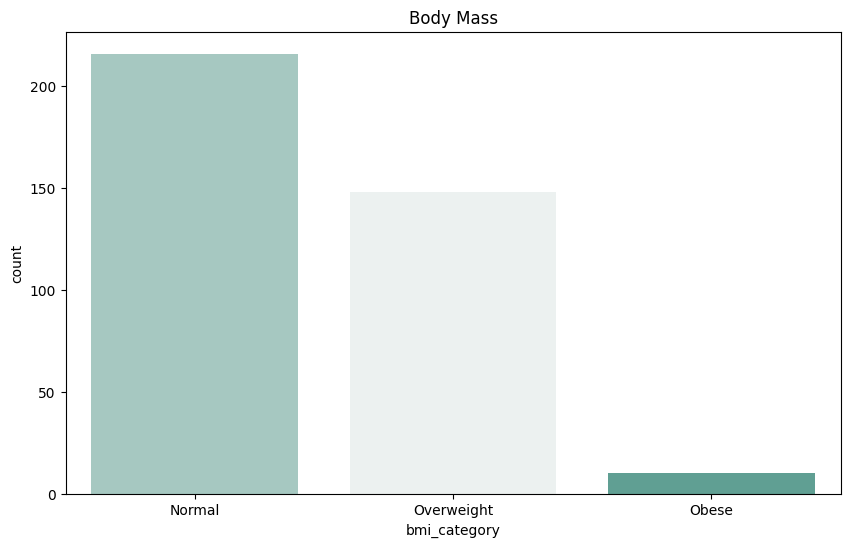

In [23]:
order_bmi = ['Normal','Overweight','Obese']

plt.figure(figsize=(10,6))
plt.title('Body Mass')
sns.countplot(data=df,x='bmi_category',order=order_bmi, hue='bmi_category',legend=False,palette="light:#5A9")
plt.show()

In [24]:
bmi_percentage = df.groupby('bmi_category')['bmi_category'].count().reset_index(name='count').sort_values(by='count',ascending=False)
bmi_percentage['percentage'] = ((bmi_percentage['count']*100)/bmi_percentage['count'].sum()).round(2)
bmi_percentage

,bmi_category,count,percentage
0,Normal,216,57.75
2,Overweight,148,39.57
1,Obese,10,2.67


## Physical Activity and Lifestyle

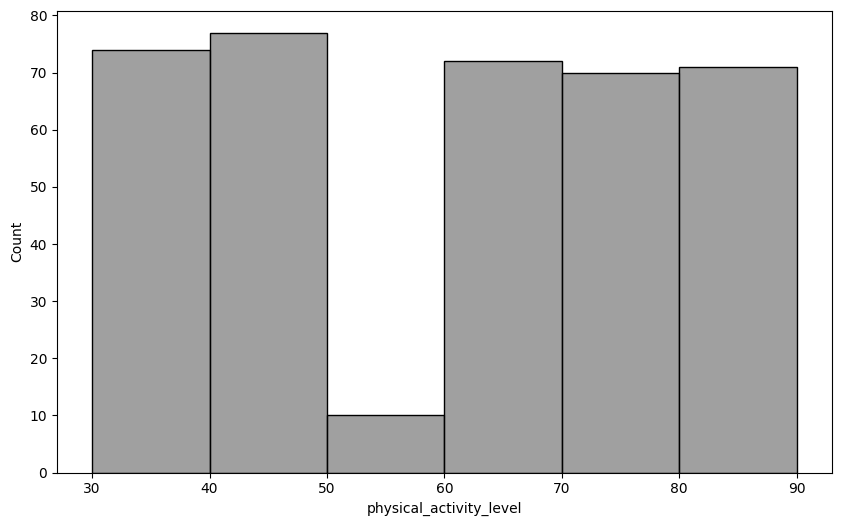

In [25]:
plt.figure(figsize=(10,6))

sns.histplot(data=df, x= 'physical_activity_level', bins=6, color='gray')
plt.show()

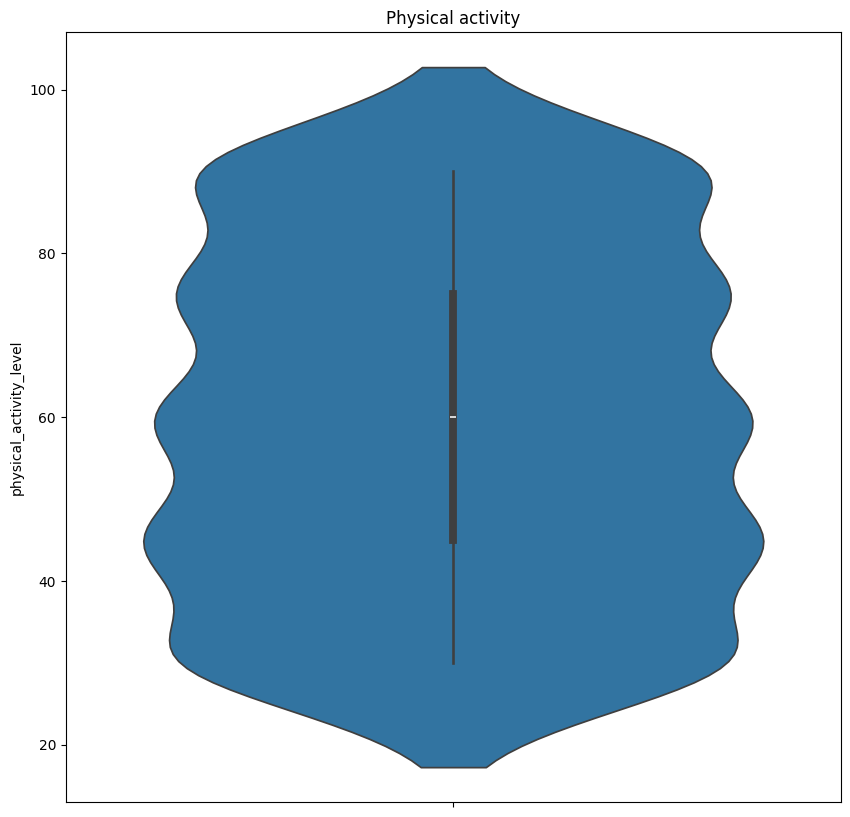

In [26]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df['physical_activity_level'])
plt.title('Physical activity')
plt.show()

In [27]:
activity_percentage = df.groupby('physical_activity_level')['physical_activity_level'].count().reset_index(name='count').sort_values(by='count',ascending=False)
activity_percentage['percentage'] = ((activity_percentage['count']*100) / activity_percentage['count'].sum()).round(2)
activity_percentage

,physical_activity_level,count,percentage
9,60,70,18.72
0,30,68,18.18
5,45,68,18.18
12,75,67,17.91
15,90,67,17.91
8,55,6,1.60
3,40,6,1.60
2,35,4,1.07
7,50,4,1.07
11,70,3,0.80


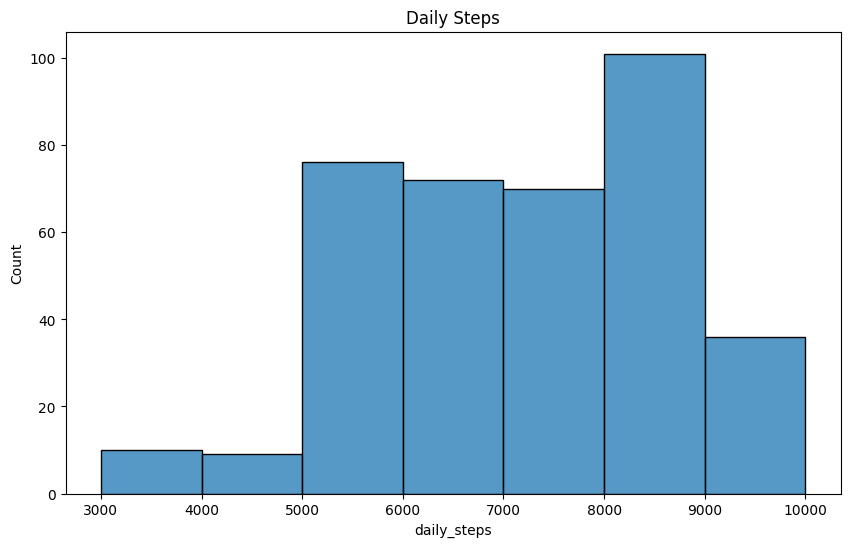

In [28]:
plt.figure(figsize=(10,6))
plt.title('Daily Steps')
sns.histplot(data=df, x='daily_steps', bins=7)
plt.show()

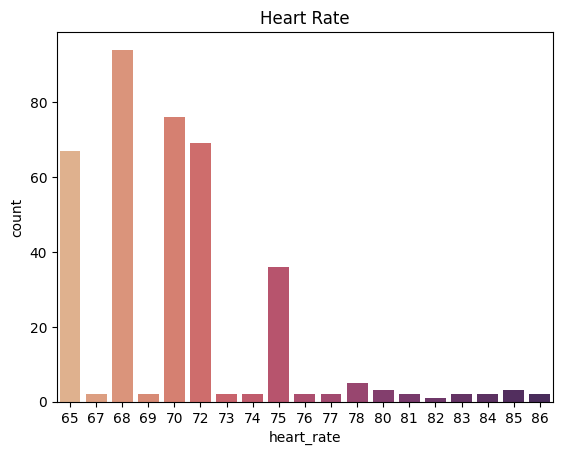

In [29]:
sns.countplot(data=df, x='heart_rate', hue='heart_rate', legend=False, palette = 'flare')
plt.title('Heart Rate')
plt.show()

## Sleep Characteristics

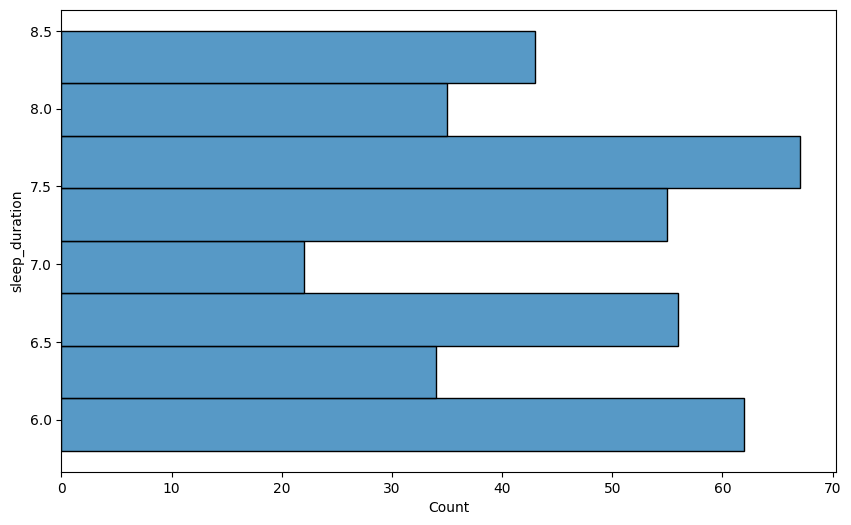

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, y='sleep_duration', bins=8)
plt.show()

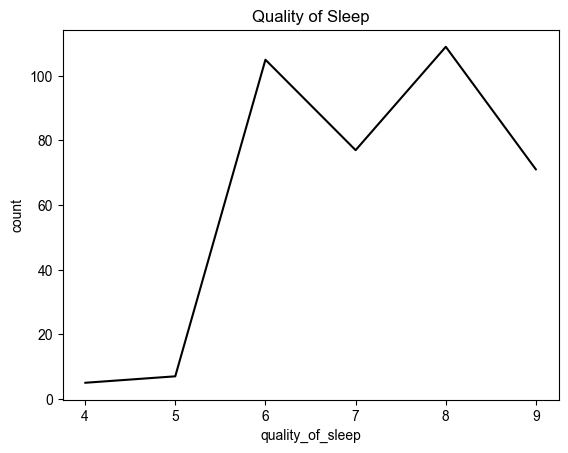

In [31]:
qosleep = (df.groupby('quality_of_sleep')['quality_of_sleep']
           .count()
           .reset_index(name='count')
           .sort_values(by='count', ascending=False))

plt.title('Quality of Sleep')
sns.set_theme(style='whitegrid')
sns.lineplot(data=qosleep, x='quality_of_sleep', y='count', color='black')
plt.show()


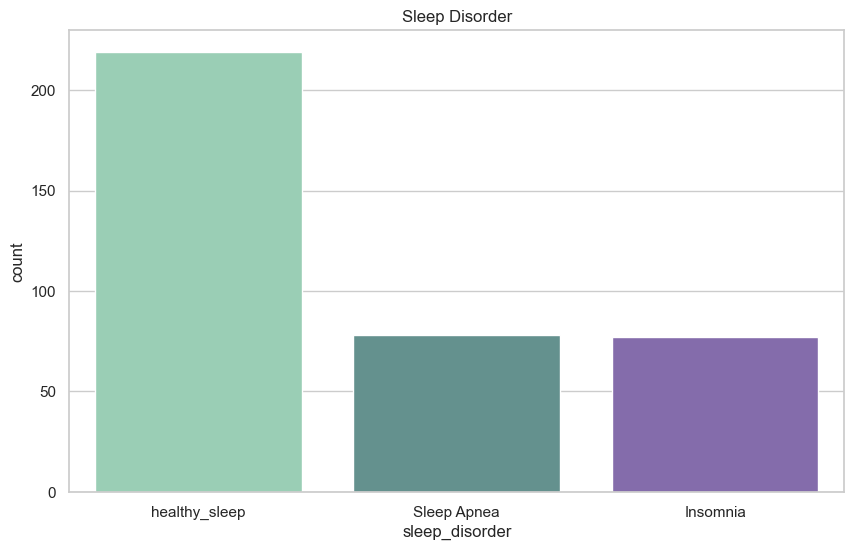

In [32]:
disorder_palette = ['#92d6b5', '#5c9994','#8262b5']
plt.figure(figsize=(10,6))
plt.title('Sleep Disorder')
sns.countplot(data=df, x='sleep_disorder', hue='sleep_disorder', legend=False, palette=disorder_palette)
plt.show()


## Key points - observed data

# Main Analysis

## Sleep

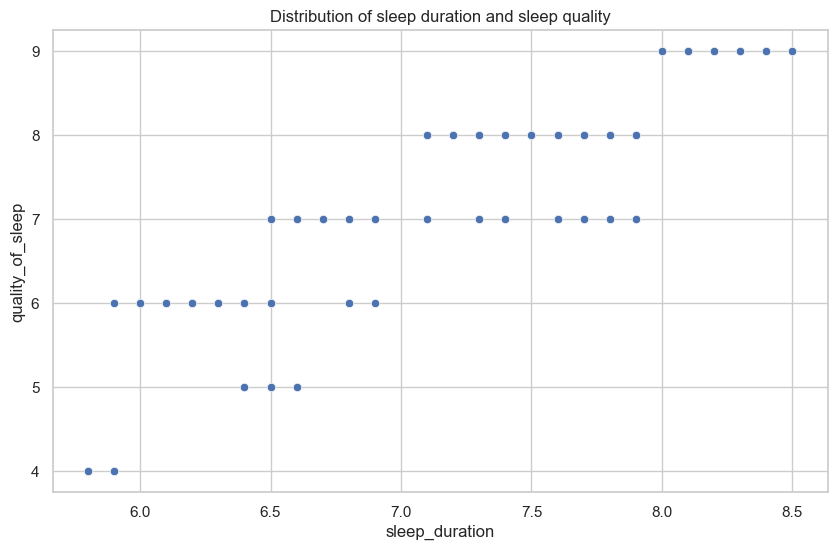

In [33]:
plt.figure(figsize=(10,6))
plt.title('Distribution of sleep duration and sleep quality')
sns.scatterplot(data=df, y='quality_of_sleep', x='sleep_duration')
plt.show()

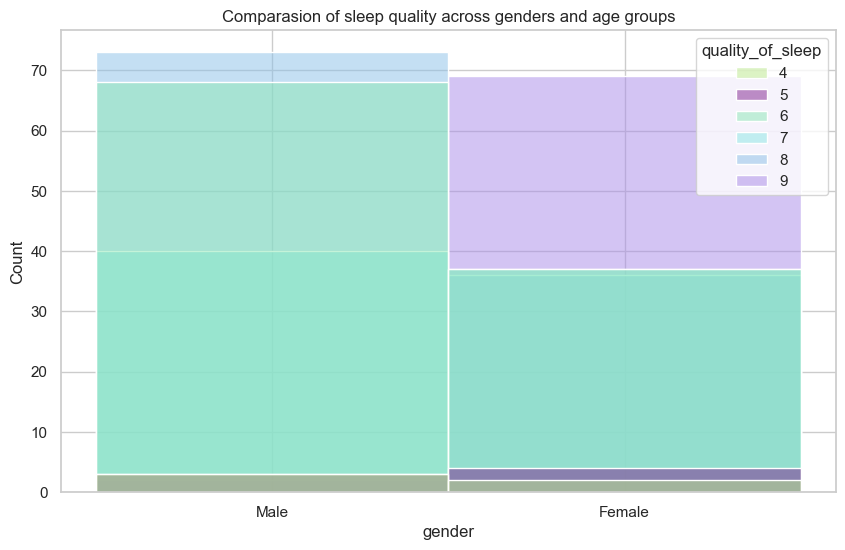

In [34]:
comparasion_palette_gender = ['#bbe88b','#81248f','#8be8b5','#8be8e5','#8bc1e8','#a98be8']
plt.figure(figsize=(10,6))
plt.title('Comparasion of sleep quality across genders and age groups')
sns.histplot(data=df, x='gender', hue='quality_of_sleep', palette=comparasion_palette_gender)
plt.show()

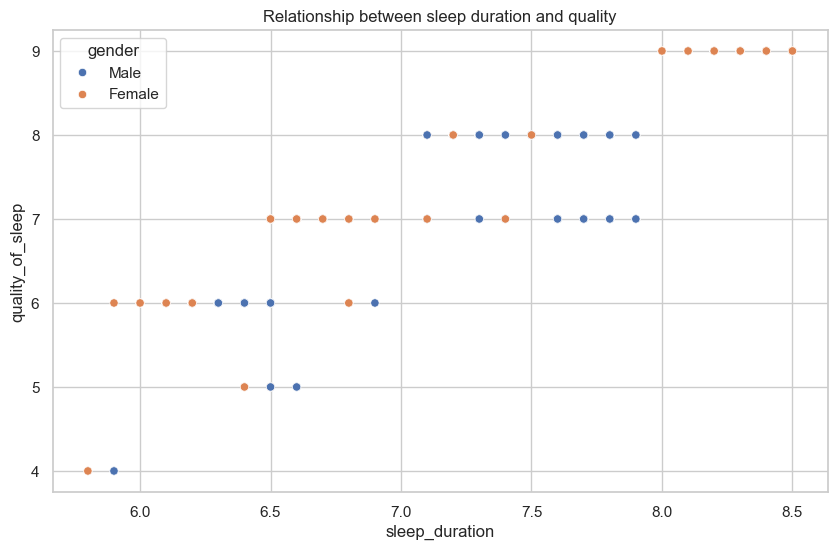

In [35]:
plt.figure(figsize=(10,6))
plt.title('Relationship between sleep duration and quality')
sns.scatterplot(data=df, y='quality_of_sleep',x='sleep_duration', hue='gender')
plt.show()

## Lifestyle Factors

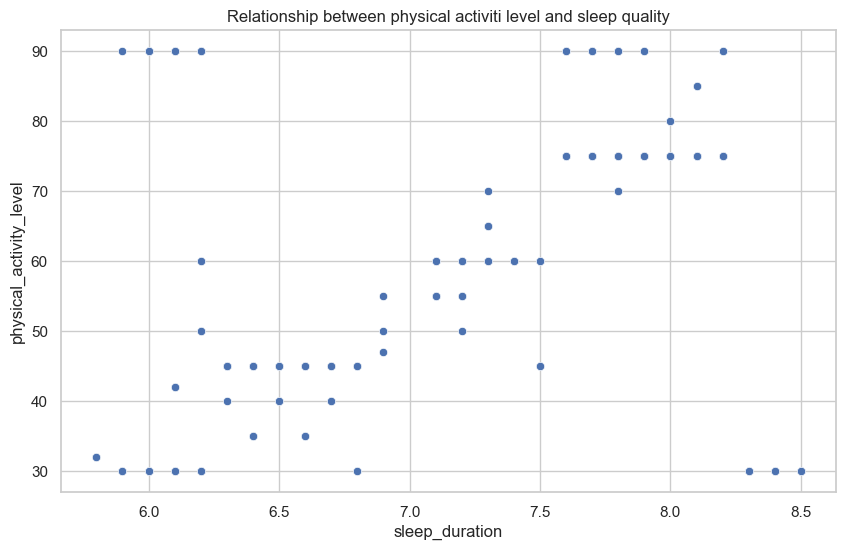

In [36]:
plt.figure(figsize=(10,6))
plt.title('Relationship between physical activiti level and sleep quality')
sns.scatterplot(data=df, y='physical_activity_level',x='sleep_duration')
plt.show()

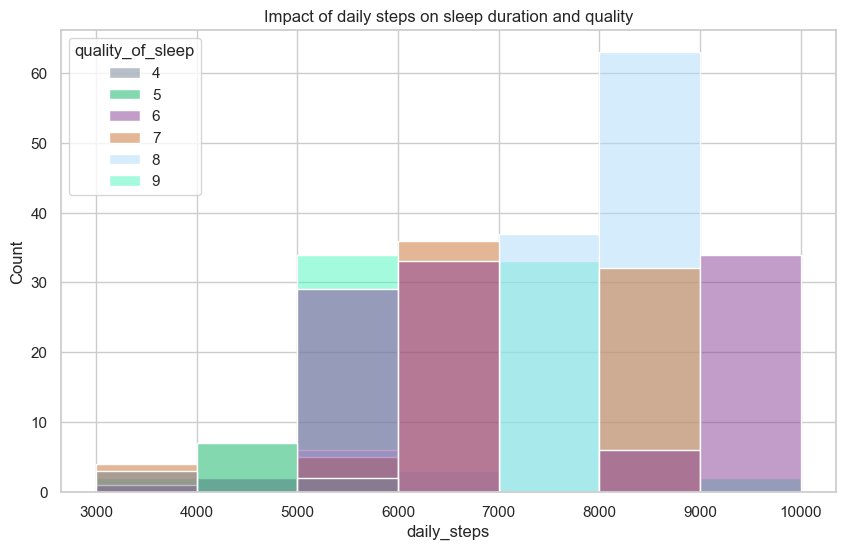

In [37]:
activity_quality_relationship = ["#728193","#0BB261","#883D96","#C96E2D","#ADDBFA","#4AF7BD"]
plt.figure(figsize=(10,6))
plt.title('Impact of daily steps on sleep duration and quality')
sns.histplot(data=df,x='daily_steps', hue='quality_of_sleep',bins=7, palette=activity_quality_relationship)
plt.show()

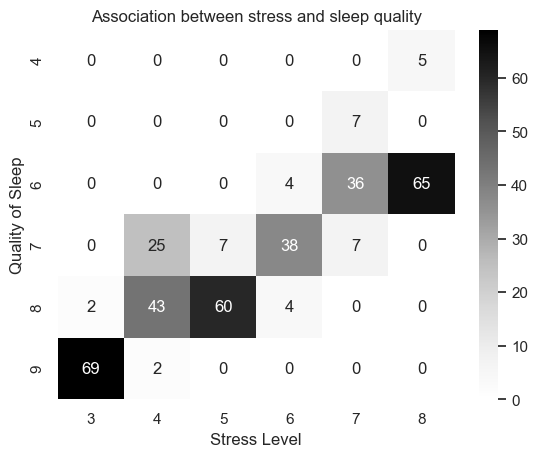

In [48]:
contingencia = pd.crosstab(df['quality_of_sleep'], df['stress_level'])
sns.heatmap(contingencia, annot=True, cmap='Greys', fmt='d')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Association between stress and sleep quality')
plt.show()

## Overall Health

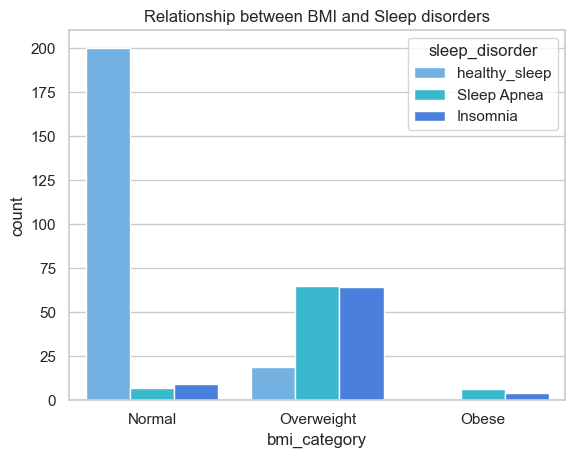

In [51]:
bmi_palette = ["#60B3F6","#21C9E7","#3278F3"]
sns.countplot(data=df, x='bmi_category', hue='sleep_disorder', palette = bmi_palette, order = ['Normal','Overweight', 'Obese'])
plt.title('Relationship between BMI and Sleep disorders')
plt.show()

In [53]:
df_disorder = df[df['sleep_disorder'] != 'healthy sleep']

df_disorder['gender'].value_counts(normalize=True)
df_disorder['bmi_category'].value_counts(normalize=True)
df_disorder['stress_level'].value_counts(normalize=True)
df_disorder[['age','sleep_duration','heart_rate','daily_steps']].mean()

(df_disorder.groupby(['gender','stress_level','bmi_category'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False))

,gender,stress_level,bmi_category,count
15,Male,5,Normal,60
22,Male,7,Overweight,36
0,Female,3,Normal,36
2,Female,4,Normal,34
18,Male,6,Normal,34
10,Female,8,Overweight,34
23,Male,8,Normal,33
1,Female,3,Overweight,31
3,Female,4,Overweight,27
9,Female,7,Overweight,8


# Key Insights